# Étude de l’impact du VIX sur les marchés boursiers mondiaux

**Problématique :** Dans quelle mesure l’évolution du VIX permet-elle d’expliquer ou d’anticiper les variations des marchés boursiers internationaux ?

On cherche à savoir si une hausse du VIX (la “peur” sur Wall Street) provoque une baisse ou une réaction similaire sur les marchés européens et asiatiques

---

## 1. Importation des packages

In [39]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings('ignore')

---

## 2. Les données

### 2.1 Importation

In [44]:
# on définit une date commune à laquelle on dispose de toutes les données (Eurostoxx50 disponible depuis mars 2007)
start_date = '2007-03-30'
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')

tickers = {
    'VIX': '^VIX',
    'S&P500': '^GSPC',
    'EuroStoxx50': '^STOXX50E',
    'Nikkei225': '^N225'
}

dic = {}

for name, ticker in tickers.items():
    data = yf.download(ticker, start=start_date, end=end_date, interval='1d')
    dic[name] = data

data = pd.concat(dic, axis=1)

# # exchange rates to convert to USD

# fx = {
#     'EURUSD': 'EURUSD=X',  # Euro -> USD
#     'JPYUSD': 'JPYUSD=X'   # Yen -> USD
# }

# dic_fx = {}

# for key, ticker in fx.items():
#     data_fx = yf.download(ticker, start=start_date, end=end_date)
#     dic_fx[key] = data_fx['Close']

# fx_data = pd.concat(dic_fx, axis=1)

# function to convert to USD


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### 2.2 Visualisation graphique

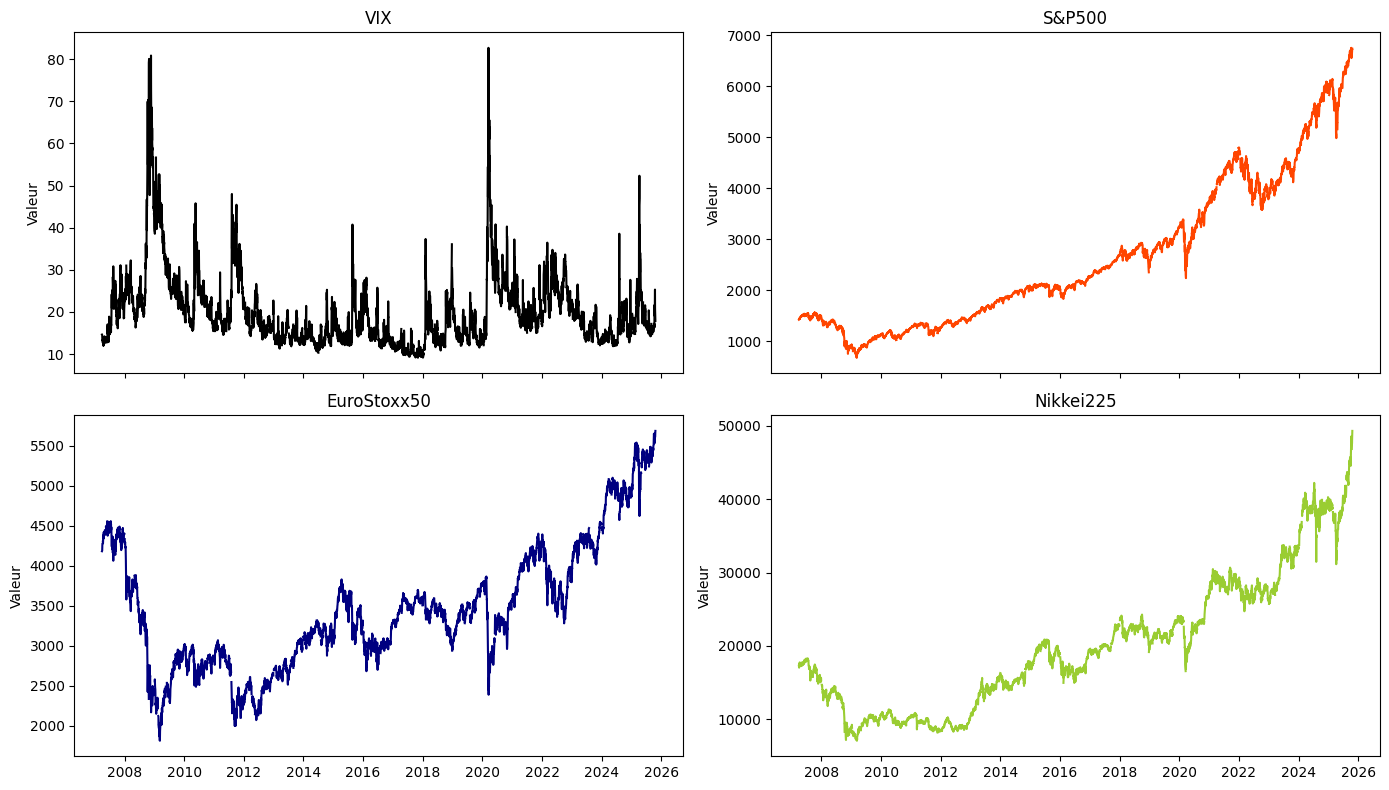

In [45]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8), sharex=True)

axs[0, 0].plot(data['VIX']['Close'], color='black')
axs[0, 0].set_title('VIX')
axs[0, 0].set_ylabel('Valeur')

axs[0, 1].plot(data['S&P500']['Close'], color='orangered')
axs[0, 1].set_title('S&P500')
axs[0, 1].set_ylabel('Valeur')

axs[1, 0].plot(data['EuroStoxx50']['Close'], color='navy')
axs[1, 0].set_title('EuroStoxx50')
axs[1, 0].set_ylabel('Valeur')

axs[1, 1].plot(data['Nikkei225']['Close'], color='yellowgreen')
axs[1, 1].set_title('Nikkei225')
axs[1, 1].set_ylabel('Valeur')

plt.tight_layout()
plt.show()

---

## 3. Stationnarité

### 3.1 Graphique ACF (autocorrelation function) et PACF (partial autocorrelation function) 

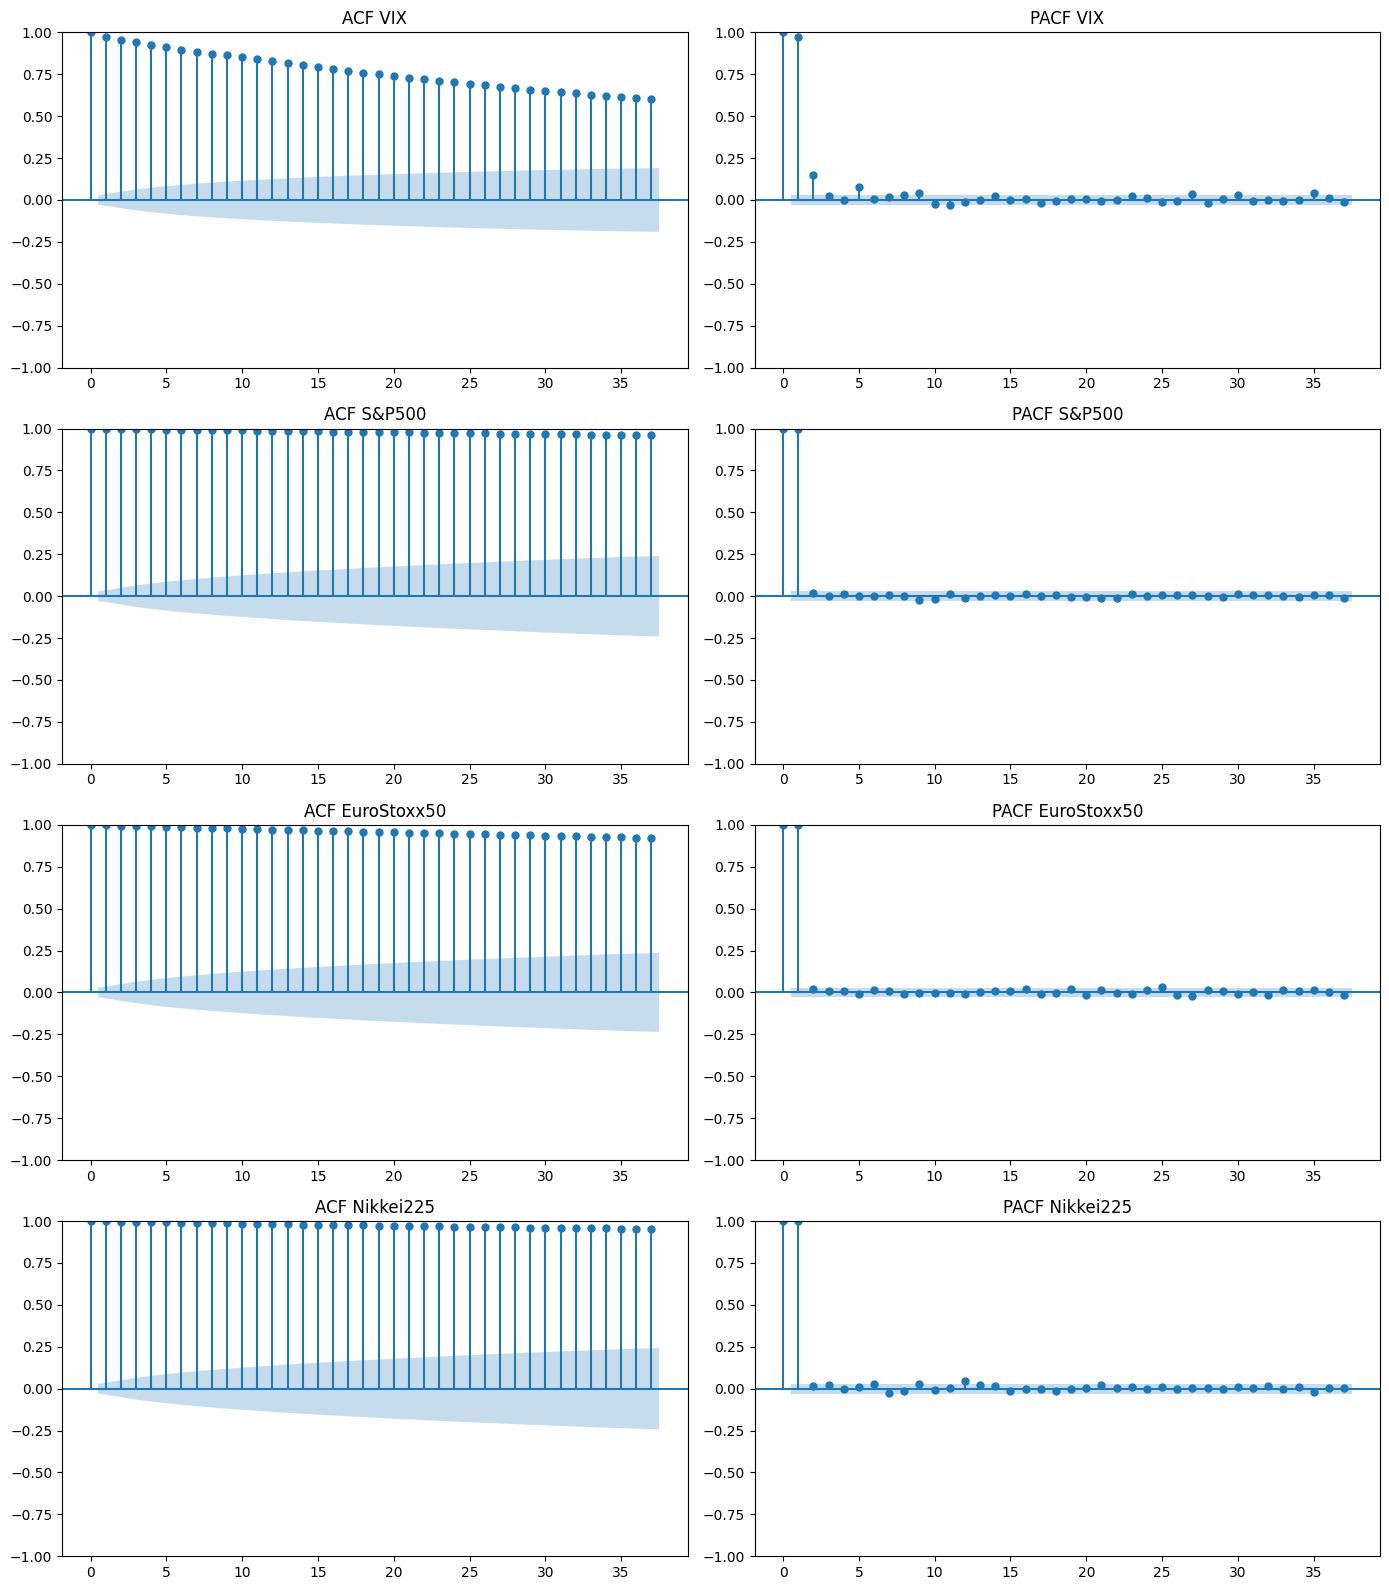

In [34]:
# ACF - PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axs = plt.subplots(4, 2, figsize=(14, 16))
plot_acf(data['VIX']['Close'].dropna(), ax=axs[0, 0], title='ACF VIX')
plot_pacf(data['VIX']['Close'].dropna(), ax=axs[0, 1], title='PACF VIX')
plot_acf(data['S&P500']['Close'].dropna(), ax=axs[1, 0], title='ACF S&P500')
plot_pacf(data['S&P500']['Close'].dropna(), ax=axs[1, 1], title='PACF S&P500')
plot_acf(data['EuroStoxx50']['Close'].dropna(), ax=axs[2, 0], title='ACF EuroStoxx50')
plot_pacf(data['EuroStoxx50']['Close'].dropna(), ax=axs[2, 1], title='PACF EuroStoxx50')
plot_acf(data['Nikkei225']['Close'].dropna(), ax=axs[3, 0], title='ACF Nikkei225')
plot_pacf(data['Nikkei225']['Close'].dropna(), ax=axs[3, 1], title='PACF Nikkei225')
plt.tight_layout()
plt.show()


On observe graphiquement dans la partie 2.2 que les séries ne sont pas stationnaires. De plus les graphiques d'autocorrélation nous confirment également la non-stationnartié des séries.

On stationnarise donc les séries.

### 3.2 Stationnarisation

In [35]:
# les rendements logarithmiques ont tendance à être stationnaires
dic_stationary = {}
for ticker,data in dic.items():
    log_returns = np.log(data['Close'] / data['Close'].shift(1))
    dic_stationary[ticker] = log_returns

log_returns = pd.concat(dic_stationary, axis=1)

print(log_returns.tail())

                 VIX    S&P500 EuroStoxx50 Nikkei225
Ticker          ^VIX     ^GSPC   ^STOXX50E     ^N225
Date                                                
2025-10-15 -0.008203  0.004018    0.009497  0.017465
2025-10-16  0.203969 -0.006314    0.008347  0.012612
2025-10-17 -0.197209  0.005257   -0.007926 -0.014513
2025-10-20 -0.130922  0.010616    0.013030  0.033141
2025-10-21 -0.019945  0.000033    0.001038  0.002651


### 3.3 Visualisation graphique 

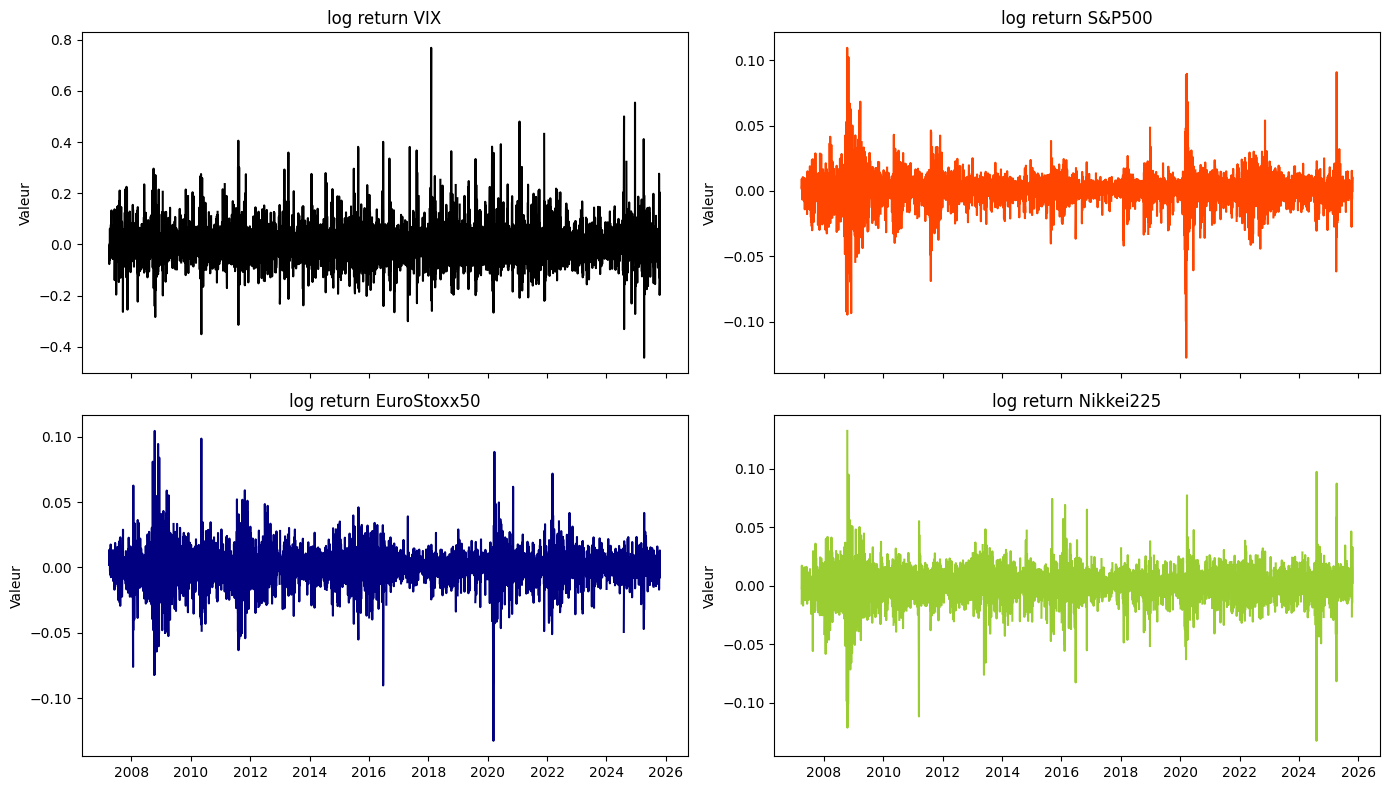

In [36]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8), sharex=True)

axs[0, 0].plot(log_returns['VIX'], color='black')
axs[0, 0].set_title('log return VIX')
axs[0, 0].set_ylabel('Valeur')

axs[0, 1].plot(log_returns['S&P500'], color='orangered')
axs[0, 1].set_title('log return S&P500')
axs[0, 1].set_ylabel('Valeur')

axs[1, 0].plot(log_returns['EuroStoxx50'], color='navy')
axs[1, 0].set_title('log return EuroStoxx50')
axs[1, 0].set_ylabel('Valeur')

axs[1, 1].plot(log_returns['Nikkei225'], color='yellowgreen')
axs[1, 1].set_title('log return Nikkei225')
axs[1, 1].set_ylabel('Valeur')

plt.tight_layout()
plt.show()

In [31]:
# fig, axs = plt.subplots(4, 2, figsize=(14, 16))
# plot_acf(log_returns['VIX'], ax=axs[0, 0], title='ACF VIX Log Returns')
# plot_pacf(log_returns['VIX'], ax=axs[0, 1], title='PACF VIX Log Returns')
# plot_acf(log_returns['S&P500'], ax=axs[1, 0], title='ACF S&P500 Log Returns')
# plot_pacf(log_returns['S&P500'], ax=axs[1, 1], title='PACF S&P500 Log Returns')
# plot_acf(log_returns['EuroStoxx50'], ax=axs[2, 0], title='ACF EuroStoxx50 Log Returns')
# plot_pacf(log_returns['EuroStoxx50'], ax=axs[2, 1], title='PACF EuroStoxx50 Log Returns')
# plot_acf(log_returns['Nikkei225'], ax=axs[3, 0], title='ACF Nikkei225 Log Returns')
# plot_pacf(log_returns['Nikkei225'], ax=axs[3, 1], title='PACF Nikkei225 Log Returns')
# plt.tight_layout()
# plt.show()  


### 3.4 Test de racines unitaires Augmented Dickey-Fuller (ADF)

In [42]:
def test_adf(series):
    result = adfuller(series.dropna())
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"  {key}: {value}")
    print("\n")

for ticker in log_returns.columns:
    print(f"--- {ticker[0]} ---")
    test_adf(log_returns[ticker])


--- VIX ---
ADF Statistic: -28.568904869581853
p-value: 0.0
Critical Values:
  1%: -3.4317534543662247
  5%: -2.8621601651729223
  10%: -2.567100116373038


--- S&P500 ---
ADF Statistic: -17.27198814319209
p-value: 5.8530765456105e-30
Critical Values:
  1%: -3.4317558681687093
  5%: -2.8621612315435416
  10%: -2.567100684049597


--- EuroStoxx50 ---
ADF Statistic: -24.876597476651675
p-value: 0.0
Critical Values:
  1%: -3.4317585936404296
  5%: -2.8621624356024813
  10%: -2.567101325023956


--- Nikkei225 ---
ADF Statistic: -40.29481564041283
p-value: 0.0
Critical Values:
  1%: -3.431792779558015
  5%: -2.862177538164107
  10%: -2.5671093648080774




**Analyse de la Stationnarité des Log Returns**

Les résultats des tests de Dickey-Fuller augmenté révèlent une stationnarité particulièrement marquée pour l'ensemble des log returns analysés. Cette constatation s'aligne avec les propriétés attendues des rendements financiers, qui présentent généralement des caractéristiques stationnaires. La différenciation log est une des méthodes de stationnarisation fréquemment utilisée.

- Le VIX affiche une statistique ADF de -28,57 avec une p-value de 0,0, indiquant une stationnarité très prononcée. Cette caractéristique suggère que les variations quotidiennes de l'indice de volatilité fluctuent autour d'un niveau moyen stable, sans tendance directionnelle persistante.

- Le S&P500 présente une statistique de -17,27 avec une p-value extrêmement faible (5,85e-30), confirmant la stationnarité de ses rendements.

- L'EuroStoxx50 présente également une stationnarité évidente avec une statistique ADF de -24,88, sa p-value est de 0,0.

- Le Nikkei225 avec une statistique de -40,29 et une p-value de 0.0 est aussi stationnaire.

In [ ]:
## 4. Modèle 